In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip -o '/content/drive/My Drive/JPEGImages.zip' -d '/content/drive/My Drive/'

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/My Drive/JPEGImages/Phoning/phoning_128.jpg  
  inflating: /content/drive/My Drive/JPEGImages/Phoning/phoning_129.jpg  
  inflating: /content/drive/My Drive/JPEGImages/Phoning/phoning_130.jpg  
  inflating: /content/drive/My Drive/JPEGImages/Phoning/phoning_131.jpg  
  inflating: /content/drive/My Drive/JPEGImages/Phoning/phoning_132.jpg  
  inflating: /content/drive/My Drive/JPEGImages/Phoning/phoning_133.jpg  
  inflating: /content/drive/My Drive/JPEGImages/Phoning/phoning_134.jpg  
  inflating: /content/drive/My Drive/JPEGImages/Phoning/phoning_135.jpg  
  inflating: /content/drive/My Drive/JPEGImages/Phoning/phoning_136.jpg  
  inflating: /content/drive/My Drive/JPEGImages/Phoning/phoning_137.jpg  
  inflating: /content/drive/My Drive/JPEGImages/Phoning/phoning_138.jpg  
  inflating: /content/drive/My Drive/JPEGImages/Phoning/phoning_139.jpg  
  inflating: /content/drive/My Drive/JPEGImages/Phoning/phoni

Defining Class Paths

In [ ]:
Applauding = '/content/drive/My Drive/JPEGImages/Applauding'
Blowing_Bubbles = '/content/drive/My Drive/JPEGImages/Blowing_Bubbles'
Brushing_Teeth  = '/content/drive/My Drive/JPEGImages/Brushing_Teeth'
Cleaning_The_Floor = '/content/drive/My Drive/JPEGImages/Cleaning_The_Floor'
Climbing = '/content/drive/My Drive/JPEGImages/Climbing'
Cooking = '/content/drive/My Drive/JPEGImages/Cooking'
Cutting_Trees = '/content/drive/My Drive/JPEGImages/Cutting_Trees'
Cutting_Vegetables = '/content/drive/My Drive/JPEGImages/Cutting_Vegetables'
Drinking = '/content/drive/My Drive/JPEGImages/Drinking'
Feeding_a_horse = '/content/drive/My Drive/JPEGImages/Feeding_a_horse'
Fishing = '/content/drive/My Drive/JPEGImages/Fishing'
Fixing_a_bike = '/content/drive/My Drive/JPEGImages/Fixing_a_bike'
Fixing_a_Car = '/content/drive/My Drive/JPEGImages/Fixing_a_Car'
Gardening = '/content/drive/My Drive/JPEGImages/Gardening'
Holding_an_Umbrella = '/content/drive/My Drive/JPEGImages/Holding_an_Umbrella'
Jumping = '/content/drive/My Drive/JPEGImages/Jumping'
Looking_through_a_Microscope = '/content/drive/My Drive/JPEGImages/Looking_through_a_Microscope'
Looking_through_a_Telescope = '/content/drive/My Drive/JPEGImages/Looking_through_a_Telescope'
Phoning = '/content/drive/My Drive/JPEGImages/Phoning'
Playing_Guitar = '/content/drive/My Drive/JPEGImages/Playing_Guitar'
Playing_Violin = '/content/drive/My Drive/JPEGImages/Playing_Violin'
Pouring_Liquid = '/content/drive/My Drive/JPEGImages/Pouring_Liquid'
Pushing_a_Cart = '/content/drive/My Drive/JPEGImages/Pushing_a_Cart'
Reading = '/content/drive/My Drive/JPEGImages/Reading'
Riding_a_Bike = '/content/drive/My Drive/JPEGImages/Riding_a_Bike'
Riding_a_Horse = '/content/drive/My Drive/JPEGImages/Riding_a_Horse'
Rowing_a_Boat = '/content/drive/My Drive/JPEGImages/Rowing_a_Boat'
Running = '/content/drive/My Drive/JPEGImages/Running'
Shooting_an_Arrow = '/content/drive/My Drive/JPEGImages/Shooting_an_Arrow'
Smoking = '/content/drive/My Drive/JPEGImages/Smoking'
Taking_Photos = '/content/drive/My Drive/JPEGImages/Taking_Photos'
Texting_Message = '/content/drive/My Drive/JPEGImages/Texting_Message'
Throwing_Frisby = '/content/drive/My Drive/JPEGImages/Throwing_Frisby'
Using_a_Computer = '/content/drive/My Drive/JPEGImages/Using_a_Computer'
Walking_the_dog = '/content/drive/My Drive/JPEGImages/Walking_the_dog'
Washing_Dishes = '/content/drive/My Drive/JPEGImages/Washing_Dishes'
Watching_TV = '/content/drive/My Drive/JPEGImages/Watching_TV'
Waving_Hands = '/content/drive/My Drive/JPEGImages/Waving_Hands'
Writing_on_a_Board = '/content/drive/My Drive/JPEGImages/Writing_on_a_Board'
Writing_on_a_Book = '/content/drive/My Drive/JPEGImages/Writing_on_a_Book'

Importing Required Libraries

In [ ]:
import os
import random
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, Dataset
from torchvision.datasets import ImageFolder
from torchvision import models
from torchvision import datasets
from torch.utils.data import DataLoader, SubsetRandomSampler
from PIL import Image
import torchvision.models as models
from sklearn.metrics import classification_report, confusion_matrix

Defining Class Paths into a Dict

In [ ]:
class_paths = {
    'Applauding': '/content/drive/My Drive/JPEGImages/Applauding',
    'Blowing_Bubbles': '/content/drive/My Drive/JPEGImages/Blowing_Bubbles',
    'Brushing_Teeth': '/content/drive/My Drive/JPEGImages/Brushing_Teeth',
    'Cleaning_The_Floor': '/content/drive/My Drive/JPEGImages/Cleaning_The_Floor',
    'Climbing': '/content/drive/My Drive/JPEGImages/Climbing',
    'Cooking': '/content/drive/My Drive/JPEGImages/Cooking',
    'Cutting_Trees': '/content/drive/My Drive/JPEGImages/Cutting_Trees',
    'Cutting_Vegetables': '/content/drive/My Drive/JPEGImages/Cutting_Vegetables',
    'Drinking': '/content/drive/My Drive/JPEGImages/Drinking',
    'Feeding_a_horse': '/content/drive/My Drive/JPEGImages/Feeding_a_horse',
    'Fishing': '/content/drive/My Drive/JPEGImages/Fishing',
    'Fixing_a_bike': '/content/drive/My Drive/JPEGImages/Fixing_a_bike',
    'Fixing_a_Car': '/content/drive/My Drive/JPEGImages/Fixing_a_Car',
    'Gardening': '/content/drive/My Drive/JPEGImages/Gardening',
    'Holding_an_Umbrella': '/content/drive/My Drive/JPEGImages/Holding_an_Umbrella',
    'Jumping': '/content/drive/My Drive/JPEGImages/Jumping',
    'Looking_through_a_Microscope': '/content/drive/My Drive/JPEGImages/Looking_through_a_Microscope',
    'Looking_through_a_Telescope': '/content/drive/My Drive/JPEGImages/Looking_through_a_Telescope',
    'Phoning': '/content/drive/My Drive/JPEGImages/Phoning',
    'Playing_Guitar': '/content/drive/My Drive/JPEGImages/Playing_Guitar',
    'Playing_Violin': '/content/drive/My Drive/JPEGImages/Playing_Violin',
    'Pouring_Liquid': '/content/drive/My Drive/JPEGImages/Pouring_Liquid',
    'Pushing_a_Cart': '/content/drive/My Drive/JPEGImages/Pushing_a_Cart',
    'Reading': '/content/drive/My Drive/JPEGImages/Reading',
    'Riding_a_Bike': '/content/drive/My Drive/JPEGImages/Riding_a_Bike',
    'Riding_a_Horse': '/content/drive/My Drive/JPEGImages/Riding_a_Horse',
    'Rowing_a_Boat': '/content/drive/My Drive/JPEGImages/Rowing_a_Boat',
    'Running': '/content/drive/My Drive/JPEGImages/Running',
    'Shooting_an_Arrow': '/content/drive/My Drive/JPEGImages/Shooting_an_Arrow',
    'Smoking': '/content/drive/My Drive/JPEGImages/Smoking',
    'Taking_Photos': '/content/drive/My Drive/JPEGImages/Taking_Photos',
    'Texting_Message': '/content/drive/My Drive/JPEGImages/Texting_Message',
    'Throwing_Frisby': '/content/drive/My Drive/JPEGImages/Throwing_Frisby',
    'Using_a_Computer': '/content/drive/My Drive/JPEGImages/Using_a_Computer',
    'Walking_the_dog': '/content/drive/My Drive/JPEGImages/Walking_the_dog',
    'Washing_Dishes': '/content/drive/My Drive/JPEGImages/Washing_Dishes',
    'Watching_TV': '/content/drive/My Drive/JPEGImages/Watching_TV',
    'Waving_Hands': '/content/drive/My Drive/JPEGImages/Waving_Hands',
    'Writing_on_a_Board': '/content/drive/My Drive/JPEGImages/Writing_on_a_Board',
    'Writing_on_a_Book': '/content/drive/My Drive/JPEGImages/Writing_on_a_Book'
}

classes = list(class_paths.keys())
print(classes)

['Applauding', 'Blowing_Bubbles', 'Brushing_Teeth', 'Cleaning_The_Floor', 'Climbing', 'Cooking', 'Cutting_Trees', 'Cutting_Vegetables', 'Drinking', 'Feeding_a_horse', 'Fishing', 'Fixing_a_bike', 'Fixing_a_Car', 'Gardening', 'Holding_an_Umbrella', 'Jumping', 'Looking_through_a_Microscope', 'Looking_through_a_Telescope', 'Phoning', 'Playing_Guitar', 'Playing_Violin', 'Pouring_Liquid', 'Pushing_a_Cart', 'Reading', 'Riding_a_Bike', 'Riding_a_Horse', 'Rowing_a_Boat', 'Running', 'Shooting_an_Arrow', 'Smoking', 'Taking_Photos', 'Texting_Message', 'Throwing_Frisby', 'Using_a_Computer', 'Walking_the_dog', 'Washing_Dishes', 'Watching_TV', 'Waving_Hands', 'Writing_on_a_Board', 'Writing_on_a_Book']


Splitting the dataset

In [ ]:
filepaths = []
labels = []

for class_name, class_path in class_paths.items():
    filelist = os.listdir(class_path)

    for filename in filelist:
        filepath = os.path.join(class_path, filename)
        filepaths.append(filepath)
        labels.append(class_name)

total_samples = len(filepaths)

train_ratio = 0.75
val_ratio = 0.15
test_ratio = 0.15

train_size = int(train_ratio * total_samples)
val_size = int(val_ratio * total_samples)
test_size = total_samples - train_size - val_size

indices = list(range(total_samples))
random.shuffle(indices)

train_indices = indices[:train_size]
val_indices = indices[train_size:train_size + val_size]
test_indices = indices[train_size + val_size:]

train_sampler = SubsetRandomSampler(train_indices)
val_sampler = SubsetRandomSampler(val_indices)
test_sampler = SubsetRandomSampler(test_indices)

print(f"Number of samples in training set: {len(train_indices)}")
print(f"Number of samples in validation set: {len(val_indices)}")
print(f"Number of samples in test set: {len(test_indices)}")

Number of samples in training set: 7149
Number of samples in validation set: 1429
Number of samples in test set: 954


In [ ]:
class CustomImageDataset(Dataset):
    def __init__(self, filepaths, labels, transform=None):
        self.filepaths = filepaths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.filepaths)

    def __getitem__(self, idx):
        img_path = self.filepaths[idx]
        label = self.labels[idx]
        img = Image.open(img_path).convert('RGB')

        if self.transform:
            img = self.transform(img)

        return img, label

Applying Transformations

In [ ]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


In [ ]:
dataset = CustomImageDataset(filepaths, labels, transform=transform)

train_loader = DataLoader(dataset, batch_size=32, sampler=train_sampler)
val_loader = DataLoader(dataset, batch_size=32, sampler=val_sampler)
test_loader = DataLoader(dataset, batch_size=32, sampler=test_sampler)

num_classes = len(class_paths)

Model - 1 VGG16

In [ ]:
import torch
import torch.nn as nn
import torch.utils.model_zoo as model_zoo

class VGG16(nn.Module):
    def __init__(self, num_classes=1000, init_weights=True):
        super(VGG16, self).__init__()
        self.features = nn.Sequential(

            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.classifier = nn.Sequential(
            nn.Linear(512 * 7 * 7, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, num_classes),
        )
        if init_weights:
            self._initialize_weights()

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.Linear):
                nn.init.normal_(m.weight, 0, 0.01)
                nn.init.constant_(m.bias, 0)

def make_vgg16(num_classes):
    model = VGG16(num_classes=1000)
    pretrained_weights = model_zoo.load_url('https://download.pytorch.org/models/vgg16-397923af.pth')
    model.load_state_dict(pretrained_weights)
    model.classifier[6] = nn.Linear(4096, num_classes)
    nn.init.normal_(model.classifier[6].weight, 0, 0.01)
    nn.init.constant_(model.classifier[6].bias, 0)
    return model

model_vgg = make_vgg16(num_classes)

# Print the model
print(model_vgg)


Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:02<00:00, 240MB/s]


VGG16(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation

Model - 2 ResNet

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.model_zoo as model_zoo

class Bottleneck(nn.Module):
    expansion = 4

    def __init__(self, in_channels, out_channels, stride=1, downsample=None):
        super(Bottleneck, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.conv3 = nn.Conv2d(out_channels, out_channels * self.expansion, kernel_size=1, bias=False)
        self.bn3 = nn.BatchNorm2d(out_channels * self.expansion)
        self.relu = nn.ReLU(inplace=True)
        self.downsample = downsample

    def forward(self, x):
        identity = x

        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)

        out = self.conv2(out)
        out = self.bn2(out)
        out = self.relu(out)

        out = self.conv3(out)
        out = self.bn3(out)

        if self.downsample is not None:
            identity = self.downsample(x)

        out += identity
        out = self.relu(out)

        return out

class ResNet(nn.Module):
    def __init__(self, block, layers, num_classes=1000):
        super(ResNet, self).__init__()
        self.in_channels = 64
        self.conv1 = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        self.layer1 = self._make_layer(block, 64, layers[0], stride=1)
        self.layer2 = self._make_layer(block, 128, layers[1], stride=2)
        self.layer3 = self._make_layer(block, 256, layers[2], stride=2)
        self.layer4 = self._make_layer(block, 512, layers[3], stride=2)
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512 * block.expansion, num_classes)

        self._initialize_weights()

    def _make_layer(self, block, out_channels, blocks, stride=1):
        downsample = None
        if stride != 1 or self.in_channels != out_channels * block.expansion:
            downsample = nn.Sequential(
                nn.Conv2d(self.in_channels, out_channels * block.expansion, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(out_channels * block.expansion),
            )

        layers = []
        layers.append(block(self.in_channels, out_channels, stride, downsample))
        self.in_channels = out_channels * block.expansion
        for _ in range(1, blocks):
            layers.append(block(self.in_channels, out_channels))

        return nn.Sequential(*layers)

    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.Linear):
                nn.init.normal_(m.weight, 0, 0.01)
                nn.init.constant_(m.bias, 0)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)

        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)

        return x

def make_resnet50(num_classes):
    model = ResNet(Bottleneck, [3, 4, 6, 3], num_classes=num_classes)
    pretrained_weights = model_zoo.load_url('https://download.pytorch.org/models/resnet50-19c8e357.pth')

    state_dict = pretrained_weights.copy()
    del state_dict['fc.weight']
    del state_dict['fc.bias']

    model.load_state_dict(state_dict, strict=False)

    model.fc = nn.Linear(2048, num_classes)

    return model

model_resnet = make_resnet50(num_classes)

print(model_resnet)


Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 163MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

Model - 3 Dense Net

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class Bottleneck(nn.Module):
    def __init__(self, in_channels, growth_rate):
        super(Bottleneck, self).__init__()
        self.bn1 = nn.BatchNorm2d(in_channels)
        self.conv1 = nn.Conv2d(in_channels, 4 * growth_rate, kernel_size=1, bias=False)
        self.bn2 = nn.BatchNorm2d(4 * growth_rate)
        self.conv2 = nn.Conv2d(4 * growth_rate, growth_rate, kernel_size=3, padding=1, bias=False)

    def forward(self, x):
        out = self.conv1(F.relu(self.bn1(x)))
        out = self.conv2(F.relu(self.bn2(out)))
        out = torch.cat([out, x], 1)
        return out

class Transition(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(Transition, self).__init__()
        self.bn = nn.BatchNorm2d(in_channels)
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size=1, bias=False)
        self.avgpool = nn.AvgPool2d(2, stride=2)

    def forward(self, x):
        out = self.conv(F.relu(self.bn(x)))
        out = self.avgpool(out)
        return out

class DenseNet(nn.Module):
    def __init__(self, growth_rate=32, block_config=(6, 12, 24, 16), num_init_features=64, num_classes=40, dropout_prob=0.5):
        super(DenseNet, self).__init__()

        self.features = nn.Sequential(
            nn.Conv2d(3, num_init_features, kernel_size=7, stride=2, padding=3, bias=False),
            nn.BatchNorm2d(num_init_features),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        )

        num_features = num_init_features
        for i, num_layers in enumerate(block_config):
            block = self._make_dense_block(num_layers, num_features, growth_rate)
            self.features.add_module('denseblock%d' % (i + 1), block)
            num_features = num_features + num_layers * growth_rate
            if i != len(block_config) - 1:
                trans = self._make_transition(num_features, num_features // 2)
                self.features.add_module('transition%d' % (i + 1), trans)
                num_features = num_features // 2

        self.features.add_module('norm5', nn.BatchNorm2d(num_features))

        self.dropout = nn.Dropout(p=dropout_prob)

        self.classifier = nn.Linear(num_features, num_classes)

    def _make_dense_block(self, num_layers, in_channels, growth_rate):
        layers = []
        for i in range(num_layers):
            layers.append(Bottleneck(in_channels + i * growth_rate, growth_rate))
        return nn.Sequential(*layers)

    def _make_transition(self, in_channels, out_channels):
        return Transition(in_channels, out_channels)

    def forward(self, x):
        features = self.features(x)
        out = F.relu(features, inplace=True)
        out = F.adaptive_avg_pool2d(out, (1, 1))
        out = torch.flatten(out, 1)
        out = self.dropout(out)
        out = self.classifier(out)
        return out

def make_densenet(num_classes=40, dropout_prob=0.5):
    model = DenseNet(num_classes=num_classes, dropout_prob=dropout_prob)
    return model

num_classes = 40
dropout_prob = 0.5
model_densenet = make_densenet(num_classes=num_classes, dropout_prob=dropout_prob)

Model - 4 Google Net

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class Inception(nn.Module):
    def __init__(self, in_channels, ch1x1, ch3x3red, ch3x3, ch5x5red, ch5x5, pool_proj):
        super(Inception, self).__init__()

        self.branch1 = nn.Conv2d(in_channels, ch1x1, kernel_size=1)

        self.branch2 = nn.Sequential(
            nn.Conv2d(in_channels, ch3x3red, kernel_size=1),
            nn.Conv2d(ch3x3red, ch3x3, kernel_size=3, padding=1)
        )

        self.branch3 = nn.Sequential(
            nn.Conv2d(in_channels, ch5x5red, kernel_size=1),
            nn.Conv2d(ch5x5red, ch5x5, kernel_size=5, padding=2)
        )

        self.branch4 = nn.Sequential(
            nn.MaxPool2d(kernel_size=3, stride=1, padding=1),
            nn.Conv2d(in_channels, pool_proj, kernel_size=1)
        )

    def forward(self, x):
        branch1 = self.branch1(x)
        branch2 = self.branch2(x)
        branch3 = self.branch3(x)
        branch4 = self.branch4(x)

        outputs = [branch1, branch2, branch3, branch4]
        return torch.cat(outputs, 1)


class GoogLeNet(nn.Module):
    def __init__(self, num_classes=1000, aux_logits=True):
        super(GoogLeNet, self).__init__()

        self.conv1 = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3)
        self.maxpool1 = nn.MaxPool2d(3, stride=2, ceil_mode=True)

        self.conv2 = nn.Conv2d(64, 64, kernel_size=1)
        self.conv3 = nn.Conv2d(64, 192, kernel_size=3, padding=1)
        self.maxpool2 = nn.MaxPool2d(3, stride=2, ceil_mode=True)

        self.inception3a = Inception(192, 64, 96, 128, 16, 32, 32)
        self.inception3b = Inception(256, 128, 128, 192, 32, 96, 64)
        self.maxpool3 = nn.MaxPool2d(3, stride=2, ceil_mode=True)

        self.inception4a = Inception(480, 192, 96, 208, 16, 48, 64)
        self.inception4b = Inception(512, 160, 112, 224, 24, 64, 64)
        self.inception4c = Inception(512, 128, 128, 256, 24, 64, 64)
        self.inception4d = Inception(512, 112, 144, 288, 32, 64, 64)

        self.inception4e = Inception(528, 256, 160, 320, 32, 128, 128)
        self.maxpool4 = nn.MaxPool2d(2, stride=2, ceil_mode=True)

        self.inception5a = Inception(832, 256, 160, 320, 32, 128, 128)
        self.inception5b = Inception(832, 384, 192, 384, 48, 128, 128)

        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.dropout = nn.Dropout(0.4)
        self.fc = nn.Linear(1024, num_classes)

    def forward(self, x):
        x = self.conv1(x)
        x = self.maxpool1(x)

        x = self.conv2(x)
        x = self.conv3(x)
        x = self.maxpool2(x)

        x = self.inception3a(x)
        x = self.inception3b(x)
        x = self.maxpool3(x)

        x = self.inception4a(x)
        x = self.inception4b(x)
        x = self.inception4c(x)
        x = self.inception4d(x)

        x = self.inception4e(x)
        x = self.maxpool4(x)

        x = self.inception5a(x)
        x = self.inception5b(x)

        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.dropout(x)
        x = self.fc(x)

        return x


model = GoogLeNet(num_classes=40, aux_logits=True)


print(model)

GoogLeNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (conv2): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
  (conv3): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (maxpool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (inception3a): Inception(
    (branch1): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1))
    (branch2): Sequential(
      (0): Conv2d(192, 96, kernel_size=(1, 1), stride=(1, 1))
      (1): Conv2d(96, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    )
    (branch3): Sequential(
      (0): Conv2d(192, 16, kernel_size=(1, 1), stride=(1, 1))
      (1): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    )
    (branch4): Sequential(
      (0): MaxPool2d(kernel_size=3, stride=1, padding=1, dilation=1, ceil_mode=False)
      (1): Conv2d(192, 32, kernel_size=(1, 1),

Traning Models

In [ ]:
def train_model(model, train_loader, val_loader, criterion, optimizer, classes, device, num_epochs=5):
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct_train = 0
        total_train = 0

        for images, labels_tuple in train_loader:
            inputs = images.to(device)
            labels = torch.tensor([classes.index(label) for label in labels_tuple]).to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)

            _, predicted = torch.max(outputs, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

        epoch_loss = running_loss / len(train_loader.dataset)
        train_acc = correct_train / total_train
        train_losses.append(epoch_loss)
        train_accuracies.append(train_acc)

        model.eval()
        val_loss = 0.0
        correct_val = 0
        total_val = 0

        with torch.no_grad():
            for images, labels_tuple in val_loader:
                inputs = images.to(device)
                labels = torch.tensor([classes.index(label) for label in labels_tuple]).to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item() * inputs.size(0)

                _, predicted = torch.max(outputs, 1)
                total_val += labels.size(0)
                correct_val += (predicted == labels).sum().item()

        val_loss /= len(val_loader.dataset)
        val_acc = correct_val / total_val
        val_losses.append(val_loss)
        val_accuracies.append(val_acc)

        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {epoch_loss:.4f}, Train Acc: {train_acc:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}')

    return model, train_losses, val_losses, train_accuracies, val_accuracies

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

a. VGG16

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

criterion = nn.CrossEntropyLoss()
optimizer_vgg = optim.Adam(model_vgg.parameters(), lr=0.00001, weight_decay=1e-4)

model_vgg = model_vgg.to(device)
model_vgg, train_losses, val_losses, train_accuracies, val_accuracies = train_model(model_vgg, train_loader, val_loader, criterion, optimizer_vgg, classes, device, num_epochs=10)


Epoch [1/10], Train Loss: 2.1610, Train Acc: 0.2416, Val Loss: 0.2298, Val Acc: 0.6172
Epoch [2/10], Train Loss: 1.0473, Train Acc: 0.6055, Val Loss: 0.1607, Val Acc: 0.7026
Epoch [3/10], Train Loss: 0.6939, Train Acc: 0.7191, Val Loss: 0.1393, Val Acc: 0.7285
Epoch [4/10], Train Loss: 0.4903, Train Acc: 0.7986, Val Loss: 0.1303, Val Acc: 0.7418
Epoch [5/10], Train Loss: 0.3520, Train Acc: 0.8545, Val Loss: 0.1306, Val Acc: 0.7488
Epoch [6/10], Train Loss: 0.2509, Train Acc: 0.8980, Val Loss: 0.1295, Val Acc: 0.7558
Epoch [7/10], Train Loss: 0.1780, Train Acc: 0.9242, Val Loss: 0.1309, Val Acc: 0.7621
Epoch [8/10], Train Loss: 0.1198, Train Acc: 0.9491, Val Loss: 0.1371, Val Acc: 0.7642
Epoch [9/10], Train Loss: 0.0900, Train Acc: 0.9628, Val Loss: 0.1354, Val Acc: 0.7789
Epoch [10/10], Train Loss: 0.0679, Train Acc: 0.9710, Val Loss: 0.1421, Val Acc: 0.7726


Evaluating VGG16 Model

In [ ]:
def evaluate_model(model, test_loader, device, classes, model_name):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels_tuple in test_loader:
            images = images.to(device)
            labels = torch.tensor([classes.index(label) for label in labels_tuple]).to(device)  # Convert labels to tensor and move to device
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    print(f'{model_name} Test Accuracy: {accuracy:.4f}')

evaluate_model(model_vgg, test_loader, device, classes, "VGG")

def evaluate_model(model, data_loader, classes, device):
    model.eval()
    correct = 0
    total = 0
    all_preds = []
    all_labels = []
    total_loss = 0.0

    with torch.no_grad():
        for images, labels_tuple in data_loader:
            inputs = images.to(device)
            labels = torch.tensor([classes.index(label) for label in labels_tuple]).to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            total_loss += loss.item() * inputs.size(0)

            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    avg_loss = total_loss / len(data_loader.dataset)
    accuracy = correct / total

    return avg_loss, accuracy, all_preds, all_labels

test_loss, test_acc, all_preds, all_labels = evaluate_model(model_vgg, test_loader, classes, device)

print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}')

VGG Test Accuracy: 0.7725
Test Loss: 0.0874, Test Accuracy: 0.7725


Plotting Training and Validation Loss and Accuracy

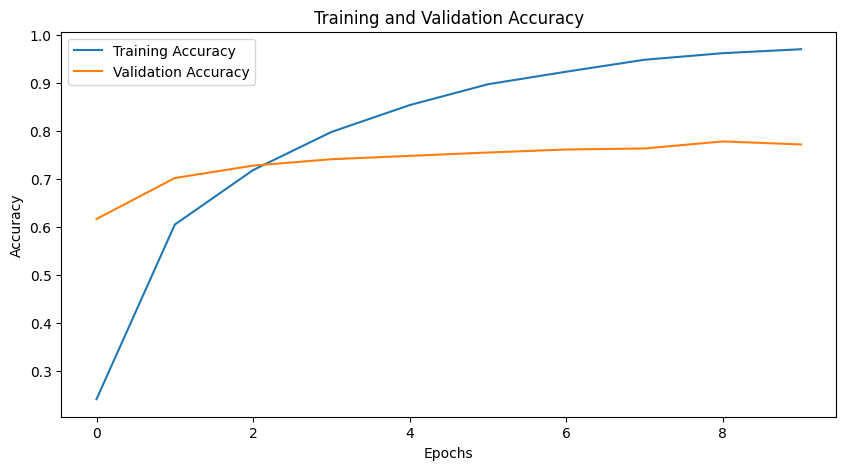

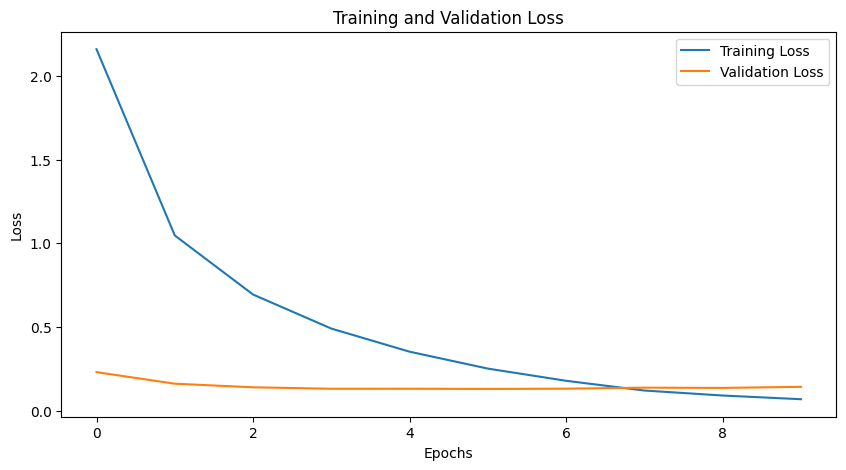

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

Confusion Matrix

[[12  0  0 ...  2  0  0]
 [ 0 28  0 ...  0  0  0]
 [ 1  1 17 ...  0  0  0]
 ...
 [ 5  0  0 ...  8  0  0]
 [ 0  0  0 ...  1 22  1]
 [ 0  0  0 ...  0  0 14]]


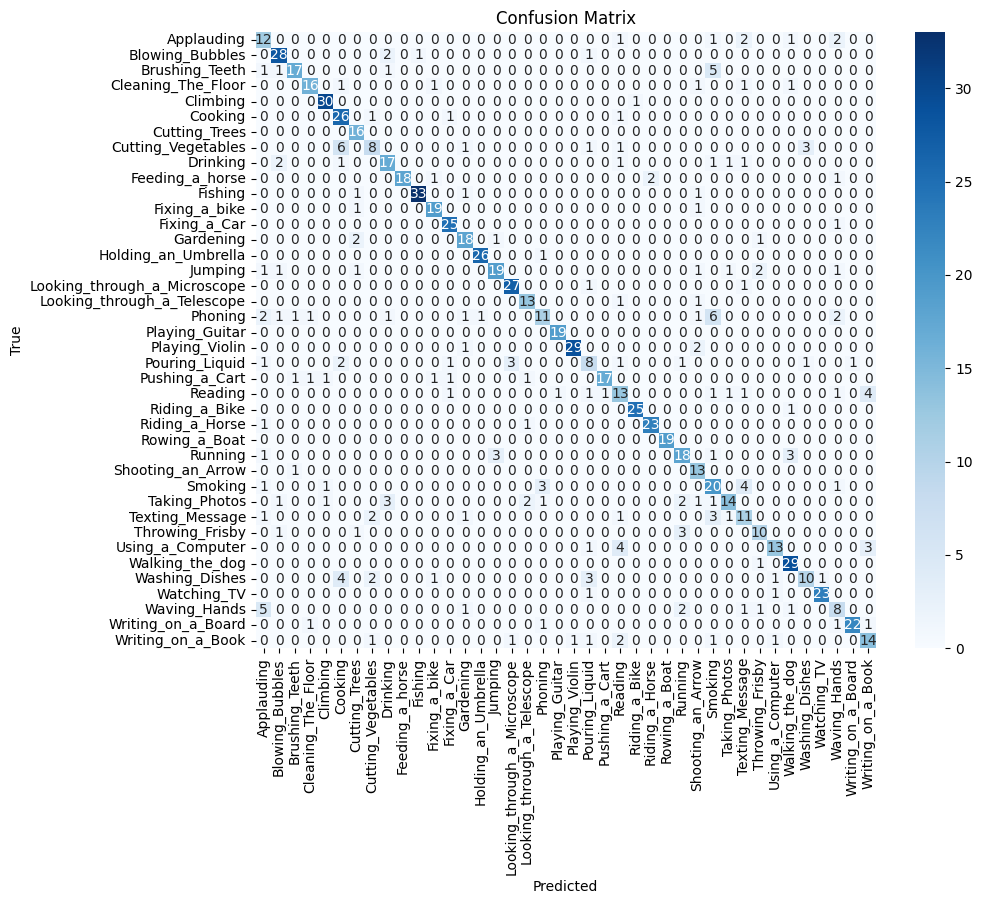

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(all_labels, all_preds)
print(conf_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Classification Report

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support

report = classification_report(all_labels, all_preds, target_names=classes)
print(report)

precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average='weighted', zero_division=1)
print(f'Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}')

                              precision    recall  f1-score   support

                  Applauding       0.46      0.63      0.53        19
             Blowing_Bubbles       0.80      0.88      0.84        32
              Brushing_Teeth       0.85      0.68      0.76        25
          Cleaning_The_Floor       0.84      0.76      0.80        21
                    Climbing       0.91      0.97      0.94        31
                     Cooking       0.65      0.90      0.75        29
               Cutting_Trees       0.73      1.00      0.84        16
          Cutting_Vegetables       0.57      0.40      0.47        20
                    Drinking       0.71      0.71      0.71        24
             Feeding_a_horse       1.00      0.82      0.90        22
                     Fishing       0.97      0.92      0.94        36
               Fixing_a_bike       0.83      0.90      0.86        21
                Fixing_a_Car       0.86      0.96      0.91        26
                   

b. Resnet Training

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer_resnet = optim.Adam(model_resnet.parameters(), lr=0.0001, weight_decay=1e-4)

model_resnet = model_resnet.to(device)
model_resnet, train_losses, val_losses, train_accuracies, val_accuracies = train_model(model_resnet, train_loader, val_loader, criterion, optimizer_resnet, classes, device, num_epochs=10)

Epoch [1/10], Train Loss: 1.1432, Train Acc: 0.6220, Val Loss: 0.1253, Val Acc: 0.7649
Epoch [2/10], Train Loss: 0.3234, Train Acc: 0.8898, Val Loss: 0.1166, Val Acc: 0.7726
Epoch [3/10], Train Loss: 0.1010, Train Acc: 0.9706, Val Loss: 0.1279, Val Acc: 0.7670
Epoch [4/10], Train Loss: 0.0519, Train Acc: 0.9856, Val Loss: 0.1155, Val Acc: 0.7852
Epoch [5/10], Train Loss: 0.0387, Train Acc: 0.9892, Val Loss: 0.1195, Val Acc: 0.7859
Epoch [6/10], Train Loss: 0.0627, Train Acc: 0.9786, Val Loss: 0.1212, Val Acc: 0.7789
Epoch [7/10], Train Loss: 0.0487, Train Acc: 0.9855, Val Loss: 0.1773, Val Acc: 0.7355
Epoch [8/10], Train Loss: 0.0837, Train Acc: 0.9689, Val Loss: 0.1568, Val Acc: 0.7439
Epoch [9/10], Train Loss: 0.0597, Train Acc: 0.9796, Val Loss: 0.1385, Val Acc: 0.7691
Epoch [10/10], Train Loss: 0.0344, Train Acc: 0.9877, Val Loss: 0.1355, Val Acc: 0.7691


Evaluating the Model

In [ ]:
def evaluate_model(model, test_loader, device, classes, model_name):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels_tuple in test_loader:
            images = images.to(device)
            labels = torch.tensor([classes.index(label) for label in labels_tuple]).to(device)  # Convert labels to tensor and move to device
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    print(f'{model_name} Test Accuracy: {accuracy:.4f}')

evaluate_model(model_resnet, test_loader, device, classes, "ResNet")

def evaluate_model(model, data_loader, classes, device):
    model.eval()
    correct = 0
    total = 0
    all_preds = []
    all_labels = []
    total_loss = 0.0

    with torch.no_grad():
        for images, labels_tuple in data_loader:
            inputs = images.to(device)
            labels = torch.tensor([classes.index(label) for label in labels_tuple]).to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            total_loss += loss.item() * inputs.size(0)

            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    avg_loss = total_loss / len(data_loader.dataset)
    accuracy = correct / total

    return avg_loss, accuracy, all_preds, all_labels

test_loss, test_acc, all_preds, all_labels = evaluate_model(model_resnet, test_loader, classes, device)

print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}')

ResNet Test Accuracy: 0.7568
Test Loss: 0.0923, Test Accuracy: 0.7568


Plotting Training and Validation Accuracy and Loss

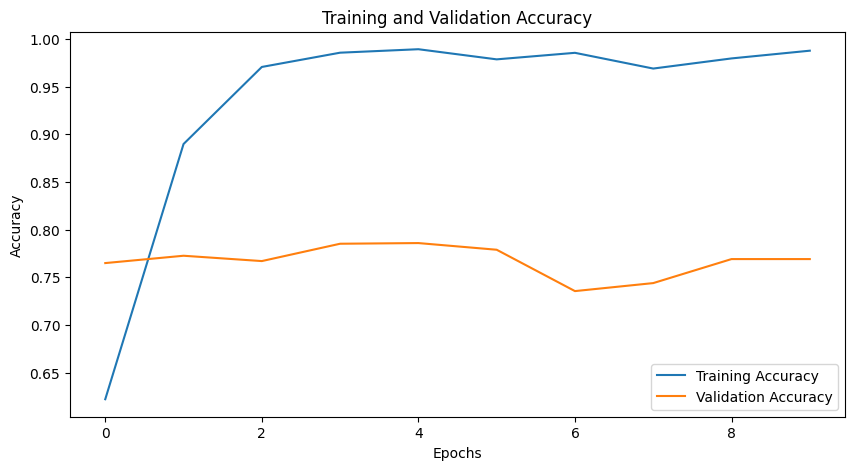

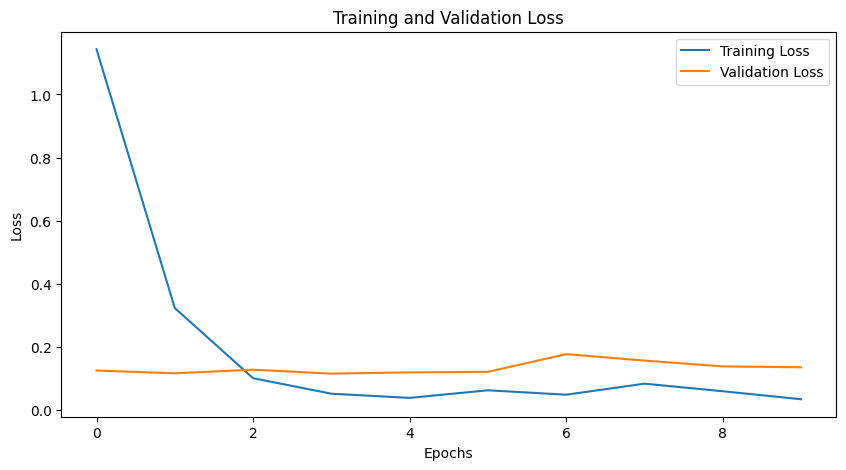

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

Confusion Matrix

[[13  0  0 ...  0  0  1]
 [ 2 22  4 ...  0  0  0]
 [ 0  0 24 ...  0  0  0]
 ...
 [ 4  0  1 ... 10  0  0]
 [ 0  0  1 ...  0 24  1]
 [ 0  0  0 ...  0  0 17]]


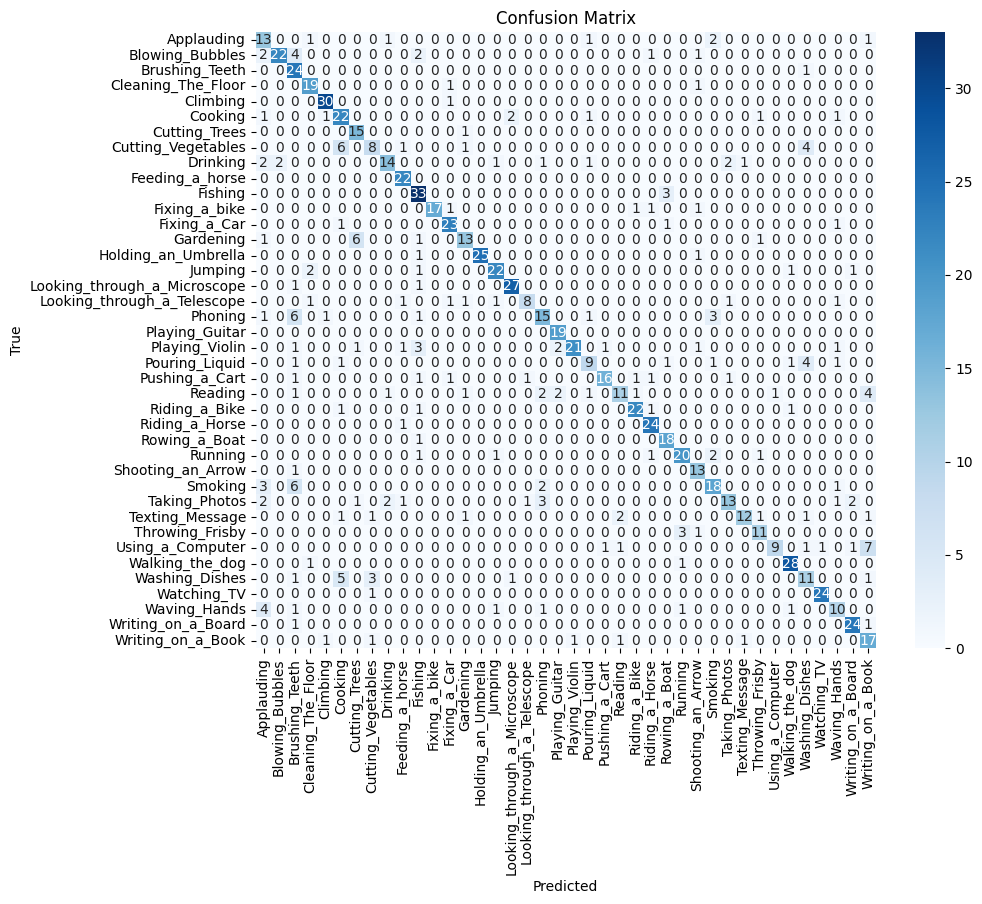

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(all_labels, all_preds)
print(conf_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Classification Report

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support

report = classification_report(all_labels, all_preds, target_names=classes)
print(report)

precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average='weighted')
print(f'Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}')

                              precision    recall  f1-score   support

                  Applauding       0.45      0.68      0.54        19
             Blowing_Bubbles       0.92      0.69      0.79        32
              Brushing_Teeth       0.49      0.96      0.65        25
          Cleaning_The_Floor       0.79      0.90      0.84        21
                    Climbing       0.91      0.97      0.94        31
                     Cooking       0.59      0.76      0.67        29
               Cutting_Trees       0.65      0.94      0.77        16
          Cutting_Vegetables       0.57      0.40      0.47        20
                    Drinking       0.78      0.58      0.67        24
             Feeding_a_horse       0.81      1.00      0.90        22
                     Fishing       0.70      0.92      0.80        36
               Fixing_a_bike       1.00      0.81      0.89        21
                Fixing_a_Car       0.82      0.88      0.85        26
                   

c. Dense Net Training

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_densenet = model_densenet.to(device)

criterion = nn.CrossEntropyLoss()
optimizer_densenet = optim.Adam(model_densenet.parameters(), lr=0.001, weight_decay=1e-5)

model_densenet, train_losses, val_losses, train_accuracies, val_accuracies = train_model(model_densenet, train_loader, val_loader, criterion, optimizer_densenet, classes, device, num_epochs=15)

Epoch [1/15], Train Loss: 2.6647, Train Acc: 0.0636, Val Loss: 0.4955, Val Acc: 0.1099
Epoch [2/15], Train Loss: 2.5076, Train Acc: 0.0978, Val Loss: 0.5488, Val Acc: 0.0924
Epoch [3/15], Train Loss: 2.4388, Train Acc: 0.1197, Val Loss: 0.5342, Val Acc: 0.1120
Epoch [4/15], Train Loss: 2.3579, Train Acc: 0.1395, Val Loss: 0.5273, Val Acc: 0.1351
Epoch [5/15], Train Loss: 2.2948, Train Acc: 0.1697, Val Loss: 0.4594, Val Acc: 0.1672
Epoch [6/15], Train Loss: 2.2251, Train Acc: 0.1915, Val Loss: 0.4374, Val Acc: 0.2078
Epoch [7/15], Train Loss: 2.1517, Train Acc: 0.2107, Val Loss: 0.4231, Val Acc: 0.2120
Epoch [8/15], Train Loss: 2.0658, Train Acc: 0.2365, Val Loss: 0.4262, Val Acc: 0.2232
Epoch [9/15], Train Loss: 1.9915, Train Acc: 0.2656, Val Loss: 0.4008, Val Acc: 0.2645
Epoch [10/15], Train Loss: 1.9377, Train Acc: 0.2779, Val Loss: 0.3876, Val Acc: 0.2659
Epoch [11/15], Train Loss: 1.8527, Train Acc: 0.3069, Val Loss: 0.3933, Val Acc: 0.2827
Epoch [12/15], Train Loss: 1.7810, Train 

Evaluating the Model

In [ ]:

def evaluate_model(model, test_loader, device, classes, model_name):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels_tuple in test_loader:
            images = images.to(device)
            labels = torch.tensor([classes.index(label) for label in labels_tuple]).to(device)  # Convert labels to tensor and move to device
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    print(f'{model_name} Test Accuracy: {accuracy:.4f}')

evaluate_model(model_densenet, test_loader, device, classes, "DenseNet")

def evaluate_model(model, data_loader, classes, device):
    model.eval()
    correct = 0
    total = 0
    all_preds = []
    all_labels = []
    total_loss = 0.0

    with torch.no_grad():
        for images, labels_tuple in data_loader:
            inputs = images.to(device)
            labels = torch.tensor([classes.index(label) for label in labels_tuple]).to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            total_loss += loss.item() * inputs.size(0)

            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    avg_loss = total_loss / len(data_loader.dataset)
    accuracy = correct / total

    return avg_loss, accuracy, all_preds, all_labels

test_loss, test_acc, all_preds, all_labels = evaluate_model(model_densenet, test_loader, classes, device)

print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}')


DenseNet Test Accuracy: 0.3176
Test Loss: 0.2473, Test Accuracy: 0.3176


Plotting Training and Validation Accuracy and Loss

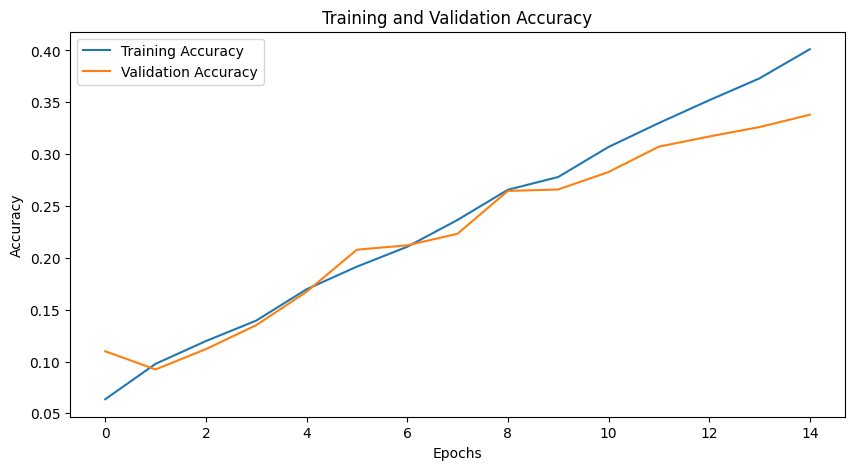

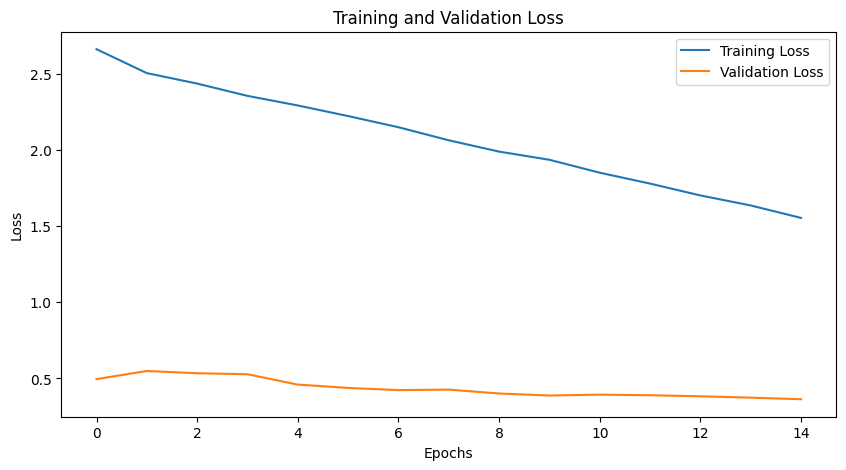

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

Confusion Matrix

[[ 9  0  0 ...  1  0  1]
 [ 6  8  2 ...  2  1  0]
 [ 0  1  9 ...  3  1  0]
 ...
 [ 2  0  3 ...  2  0  0]
 [ 1  0  1 ...  4 10  1]
 [ 0  0  0 ...  0  1  7]]


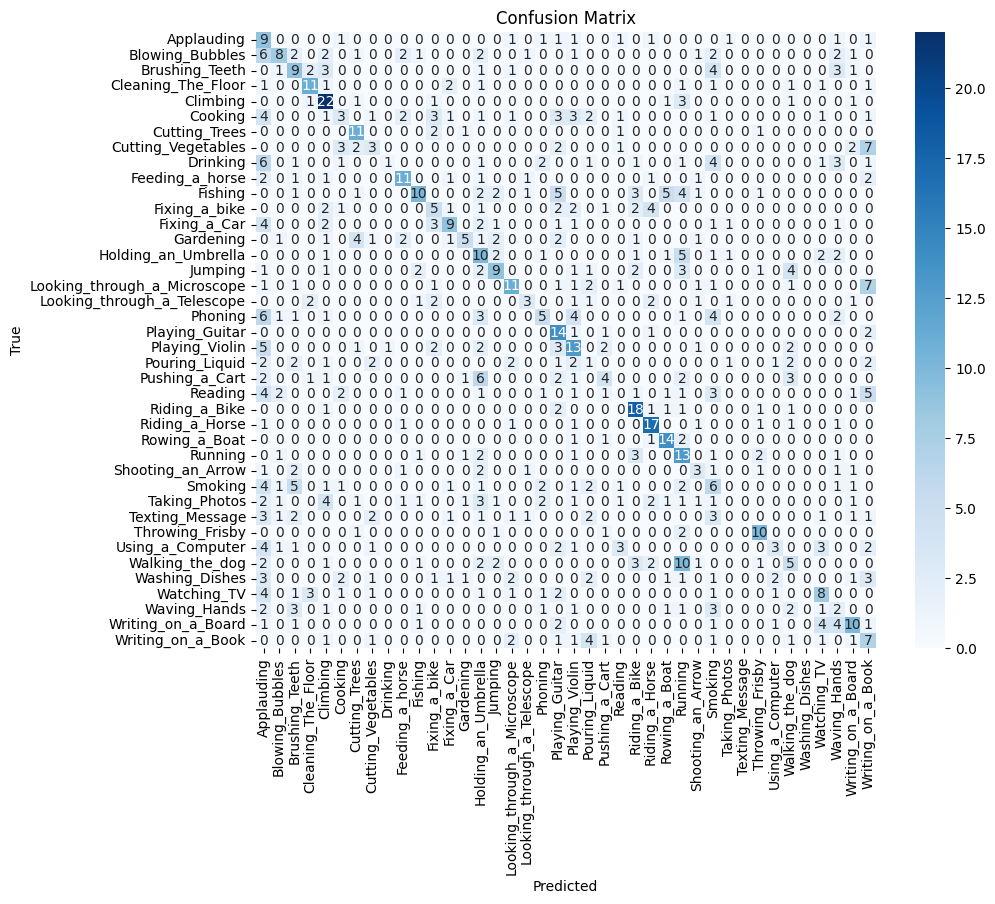

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(all_labels, all_preds)
print(conf_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Classification Report

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support

report = classification_report(all_labels, all_preds, target_names=classes)
print(report)

precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average='weighted')
print(f'Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}')

                              precision    recall  f1-score   support

                  Applauding       0.11      0.47      0.18        19
             Blowing_Bubbles       0.44      0.25      0.32        32
              Brushing_Teeth       0.27      0.36      0.31        25
          Cleaning_The_Floor       0.55      0.52      0.54        21
                    Climbing       0.45      0.71      0.55        31
                     Cooking       0.20      0.10      0.14        29
               Cutting_Trees       0.48      0.69      0.56        16
          Cutting_Vegetables       0.23      0.15      0.18        20
                    Drinking       0.50      0.04      0.08        24
             Feeding_a_horse       0.52      0.50      0.51        22
                     Fishing       0.53      0.28      0.36        36
               Fixing_a_bike       0.25      0.24      0.24        21
                Fixing_a_Car       0.50      0.35      0.41        26
                   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

d. Google Net Training

In [ ]:
def train_model(model, train_loader, val_loader, criterion, optimizer, classes, device, num_epochs=5):
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    model.to(device)

    for epoch in range(num_epochs):

        model.train()
        running_loss = 0.0
        correct_train = 0
        total_train = 0

        for images, labels_tuple in train_loader:
            inputs = images.to(device)
            labels = torch.tensor([classes.index(label) for label in labels_tuple]).to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)

            _, predicted = torch.max(outputs, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

        epoch_loss = running_loss / len(train_loader.dataset)
        train_acc = correct_train / total_train
        train_losses.append(epoch_loss)
        train_accuracies.append(train_acc)

        model.eval()
        val_loss = 0.0
        correct_val = 0
        total_val = 0

        with torch.no_grad():
            for images, labels_tuple in val_loader:
                inputs = images.to(device)
                labels = torch.tensor([classes.index(label) for label in labels_tuple]).to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item() * inputs.size(0)

                _, predicted = torch.max(outputs, 1)
                total_val += labels.size(0)
                correct_val += (predicted == labels).sum().item()

        val_loss /= len(val_loader.dataset)
        val_acc = correct_val / total_val
        val_losses.append(val_loss)
        val_accuracies.append(val_acc)

        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {epoch_loss:.4f}, Train Acc: {train_acc:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}')

    return model, train_losses, val_losses, train_accuracies, val_accuracies

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = GoogLeNet(num_classes=40, aux_logits=True)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)
trained_model, train_losses, val_losses, train_accuracies, val_accuracies = train_model(model, train_loader, val_loader, criterion, optimizer, classes, device=device, num_epochs=15)

Epoch [1/15], Train Loss: 2.9927, Train Acc: 0.0340, Val Loss: 0.5373, Val Acc: 0.0455
Epoch [2/15], Train Loss: 2.6932, Train Acc: 0.0473, Val Loss: 0.5275, Val Acc: 0.0511
Epoch [3/15], Train Loss: 2.6526, Train Acc: 0.0523, Val Loss: 0.5270, Val Acc: 0.0462
Epoch [4/15], Train Loss: 2.6347, Train Acc: 0.0578, Val Loss: 0.5174, Val Acc: 0.0693
Epoch [5/15], Train Loss: 2.5942, Train Acc: 0.0671, Val Loss: 0.5145, Val Acc: 0.0952
Epoch [6/15], Train Loss: 2.5468, Train Acc: 0.0778, Val Loss: 0.4951, Val Acc: 0.0959
Epoch [7/15], Train Loss: 2.4952, Train Acc: 0.0911, Val Loss: 0.4943, Val Acc: 0.1036
Epoch [8/15], Train Loss: 2.4923, Train Acc: 0.0985, Val Loss: 0.4943, Val Acc: 0.1008
Epoch [9/15], Train Loss: 2.4692, Train Acc: 0.1060, Val Loss: 0.4894, Val Acc: 0.1085
Epoch [10/15], Train Loss: 2.4218, Train Acc: 0.1188, Val Loss: 0.4740, Val Acc: 0.1428
Epoch [11/15], Train Loss: 2.3623, Train Acc: 0.1418, Val Loss: 0.4756, Val Acc: 0.1218
Epoch [12/15], Train Loss: 2.3320, Train 

Evaluating the model

In [ ]:
def evaluate_model(model, test_loader, device, classes, model_name):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels_tuple in test_loader:
            images = images.to(device)
            labels = torch.tensor([classes.index(label) for label in labels_tuple]).to(device)  # Convert labels to tensor and move to device
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = correct / total
    print(f'{model_name} Test Accuracy: {accuracy:.4f}')

evaluate_model(model, test_loader, device, classes, "GoogleNet")

def evaluate_model(model, data_loader, classes, device):
    model.eval()
    correct = 0
    total = 0
    all_preds = []
    all_labels = []
    total_loss = 0.0

    with torch.no_grad():
        for images, labels_tuple in data_loader:
            inputs = images.to(device)
            labels = torch.tensor([classes.index(label) for label in labels_tuple]).to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            total_loss += loss.item() * inputs.size(0)

            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    avg_loss = total_loss / len(data_loader.dataset)
    accuracy = correct / total

    return avg_loss, accuracy, all_preds, all_labels


test_loss, test_acc, all_preds, all_labels = evaluate_model(model, test_loader, classes, device)

print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}')

GoogleNet Test Accuracy: 0.1960
Test Loss: 0.2978, Test Accuracy: 0.1960


Plotting Training and Validation Accuracy and Loss

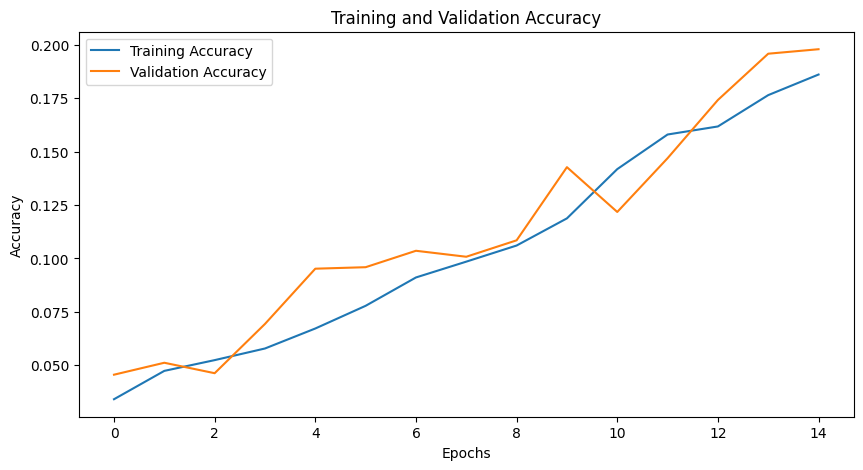

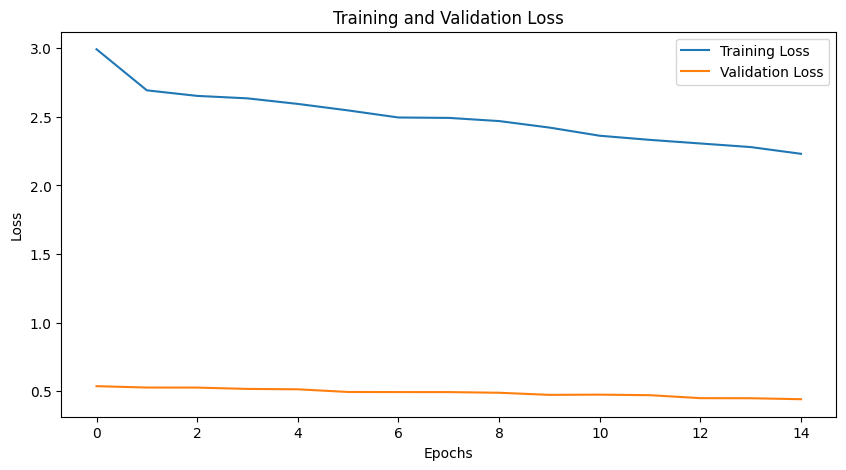

In [ ]:

plt.figure(figsize=(10, 5))
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

Confusion Matrix

[[ 0  0  0 ...  0  0  0]
 [ 0  4  0 ...  0  2  1]
 [ 0  0  1 ...  0  3  1]
 ...
 [ 0  0  3 ...  1  2  0]
 [ 0  0  1 ...  0 13  0]
 [ 0  1  0 ...  0  1  1]]


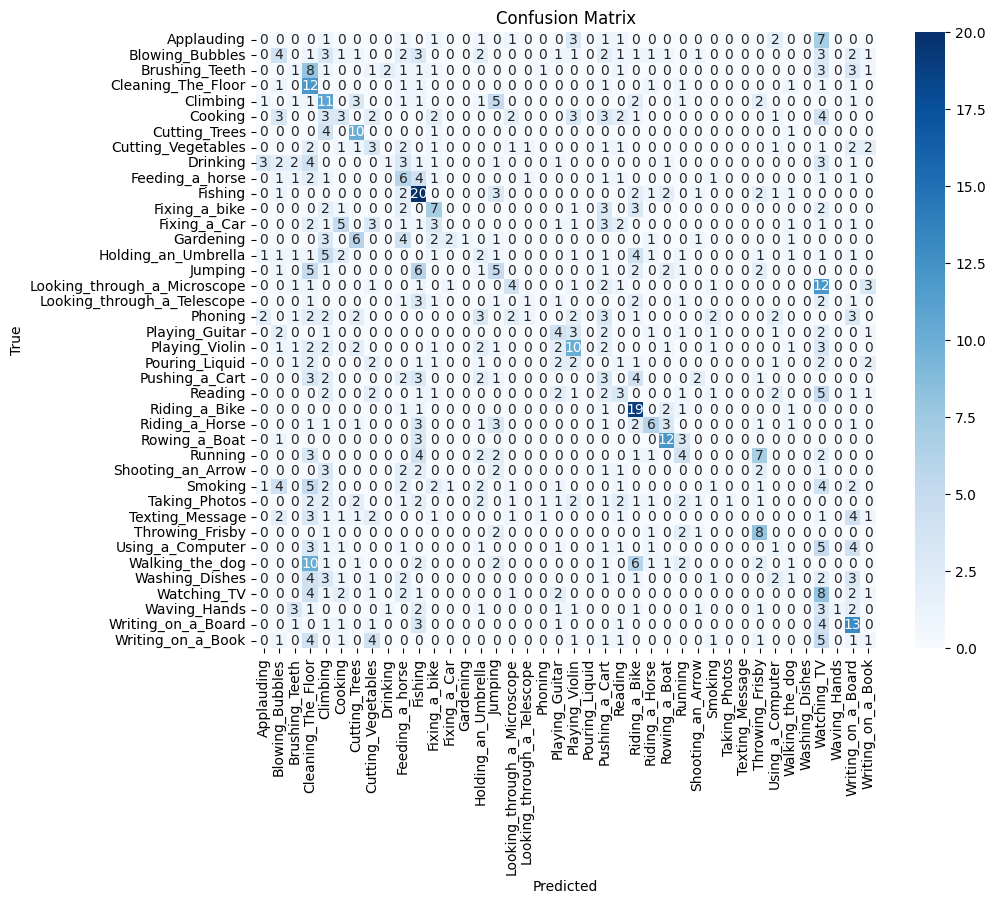

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(all_labels, all_preds)
print(conf_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Classification Report

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support

report = classification_report(all_labels, all_preds, target_names=classes)
print(report)

precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average='weighted')
print(f'Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}')

                              precision    recall  f1-score   support

                  Applauding       0.00      0.00      0.00        19
             Blowing_Bubbles       0.16      0.12      0.14        32
              Brushing_Teeth       0.07      0.04      0.05        25
          Cleaning_The_Floor       0.13      0.57      0.22        21
                    Climbing       0.18      0.35      0.24        31
                     Cooking       0.15      0.10      0.12        29
               Cutting_Trees       0.33      0.62      0.43        16
          Cutting_Vegetables       0.13      0.15      0.14        20
                    Drinking       0.25      0.04      0.07        24
             Feeding_a_horse       0.15      0.27      0.19        22
                     Fishing       0.29      0.56      0.38        36
               Fixing_a_bike       0.25      0.33      0.29        21
                Fixing_a_Car       0.00      0.00      0.00        26
                   

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

Applying Pre trained models for Google Net and Dense Net and comparing it with from scratch models

a. Google Net

In [ ]:
import torchvision.models as models
pretrained_model_googlenet = models.googlenet(pretrained=True)
pretrained_model_densenet = models.densenet121(pretrained=True)
import torch.nn as nn

num_classes = len(class_paths)

pretrained_model_googlenet.fc = nn.Linear(pretrained_model_googlenet.fc.in_features, num_classes)

print(pretrained_model_googlenet)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=GoogLeNet_Weights.IMAGENET1K_V1`. You can also use `weights=GoogLeNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/googlenet-1378be20.pth" to /root/.cache/torch/hub/checkpoints/googlenet-1378be20.pth
100%|██████████| 49.7M/49.7M [00:01<00:00, 36.9MB/s]
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be remo

GoogLeNet(
  (conv1): BasicConv2d(
    (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (conv2): BasicConv2d(
    (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): BasicConv2d(
    (conv): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (inception3a): Inception(
    (branch1): BasicConv2d(
      (conv): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track

Training Google Net model

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

def train_model(model, train_loader, val_loader, criterion, optimizer, classes, device, num_epochs=5):

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct_train = 0
        total_train = 0

        for images, labels_tuple in train_loader:
            inputs = images.to(device)
            labels = torch.tensor([classes.index(label) for label in labels_tuple]).to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)

            _, predicted = torch.max(outputs, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

        epoch_loss = running_loss / len(train_loader.dataset)
        train_acc = correct_train / total_train

        model.eval()
        val_loss = 0.0
        correct_val = 0
        total_val = 0

        with torch.no_grad():
            for images, labels_tuple in val_loader:
                inputs = images.to(device)
                labels = torch.tensor([classes.index(label) for label in labels_tuple]).to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item() * inputs.size(0)

                _, predicted = torch.max(outputs, 1)
                total_val += labels.size(0)
                correct_val += (predicted == labels).sum().item()

        val_loss /= len(val_loader.dataset)
        val_acc = correct_val / total_val

        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {epoch_loss:.4f}, Train Acc: {train_acc:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}')

    return model


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

criterion = nn.CrossEntropyLoss()
optimizer_googlenet = optim.Adam(pretrained_model_googlenet.parameters(), lr=0.0001)

pretrained_model_googlenet = pretrained_model_googlenet.to(device)
pretrained_model_googlenet = train_model(pretrained_model_googlenet, train_loader, val_loader, criterion, optimizer_googlenet, classes, device, num_epochs=10)


Epoch [1/10], Train Loss: 1.9040, Train Acc: 0.4514, Val Loss: 0.2379, Val Acc: 0.6242
Epoch [2/10], Train Loss: 0.9088, Train Acc: 0.7267, Val Loss: 0.1579, Val Acc: 0.7159
Epoch [3/10], Train Loss: 0.4830, Train Acc: 0.8596, Val Loss: 0.1363, Val Acc: 0.7474
Epoch [4/10], Train Loss: 0.2421, Train Acc: 0.9442, Val Loss: 0.1260, Val Acc: 0.7509
Epoch [5/10], Train Loss: 0.1085, Train Acc: 0.9841, Val Loss: 0.1215, Val Acc: 0.7614
Epoch [6/10], Train Loss: 0.0510, Train Acc: 0.9968, Val Loss: 0.1198, Val Acc: 0.7684
Epoch [7/10], Train Loss: 0.0277, Train Acc: 0.9985, Val Loss: 0.1189, Val Acc: 0.7670
Epoch [8/10], Train Loss: 0.0176, Train Acc: 0.9996, Val Loss: 0.1216, Val Acc: 0.7642
Epoch [9/10], Train Loss: 0.0123, Train Acc: 1.0000, Val Loss: 0.1216, Val Acc: 0.7635
Epoch [10/10], Train Loss: 0.0092, Train Acc: 0.9999, Val Loss: 0.1222, Val Acc: 0.7719


Evaluating the Model

In [ ]:
def evaluate_model(model, data_loader, classes, device):
    model.eval()
    correct = 0
    total = 0
    all_preds = []
    all_labels = []
    total_loss = 0.0

    with torch.no_grad():
        for images, labels_tuple in data_loader:
            inputs = images.to(device)
            labels = torch.tensor([classes.index(label) for label in labels_tuple]).to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            total_loss += loss.item() * inputs.size(0)

            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    avg_loss = total_loss / len(data_loader.dataset)
    accuracy = correct / total

    return avg_loss, accuracy, all_preds, all_labels

test_loss, test_acc, all_preds, all_labels = evaluate_model(pretrained_model_googlenet, test_loader, classes, device)

print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}')

Test Loss: 0.0788, Test Accuracy: 0.7652


Plotting Training and Validation Accuracy and Loss

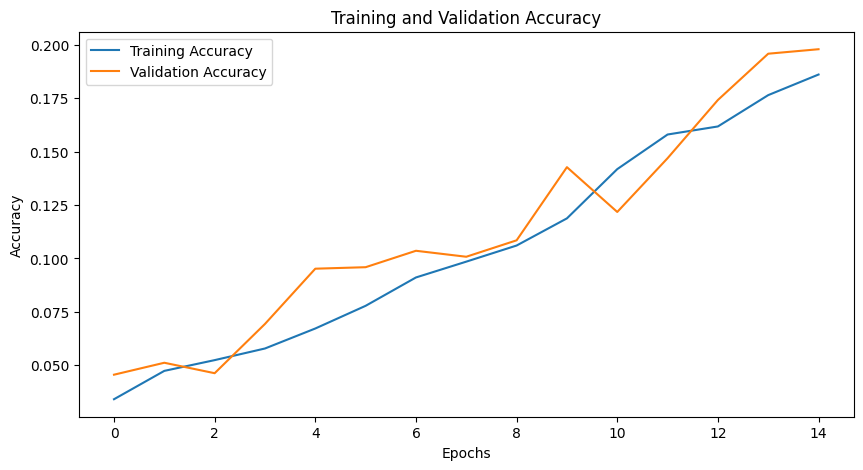

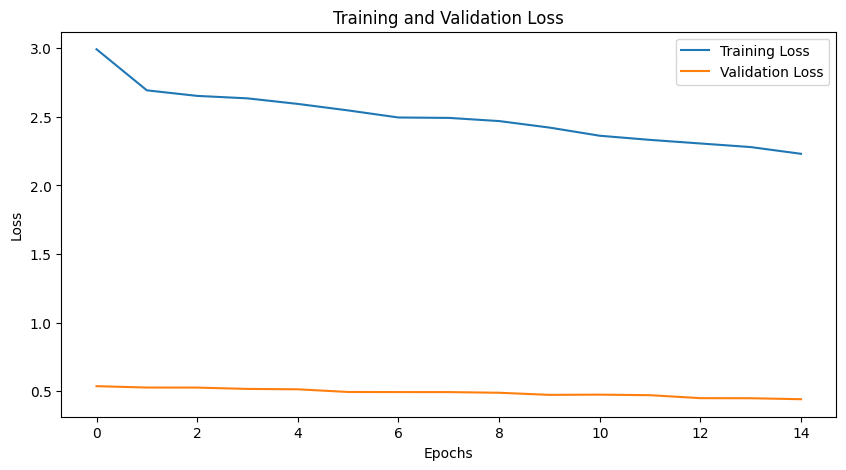

In [ ]:

plt.figure(figsize=(10, 5))
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

Classification Report

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support

report = classification_report(all_labels, all_preds, target_names=classes)
print(report)

precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average='weighted')
print(f'Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}')

                              precision    recall  f1-score   support

                  Applauding       0.45      0.74      0.56        19
             Blowing_Bubbles       0.80      0.75      0.77        32
              Brushing_Teeth       0.81      0.68      0.74        25
          Cleaning_The_Floor       0.75      0.86      0.80        21
                    Climbing       0.85      0.94      0.89        31
                     Cooking       0.73      0.66      0.69        29
               Cutting_Trees       0.88      0.88      0.88        16
          Cutting_Vegetables       0.44      0.40      0.42        20
                    Drinking       0.64      0.67      0.65        24
             Feeding_a_horse       0.87      0.91      0.89        22
                     Fishing       1.00      0.89      0.94        36
               Fixing_a_bike       0.90      0.86      0.88        21
                Fixing_a_Car       1.00      0.88      0.94        26
                   

Confusion Matrix

[[14  0  0 ...  1  0  0]
 [ 2 24  2 ...  0  0  0]
 [ 0  2 17 ...  0  0  0]
 ...
 [ 3  0  0 ... 11  1  0]
 [ 0  0  0 ...  1 21  0]
 [ 0  0  0 ...  0  0 13]]


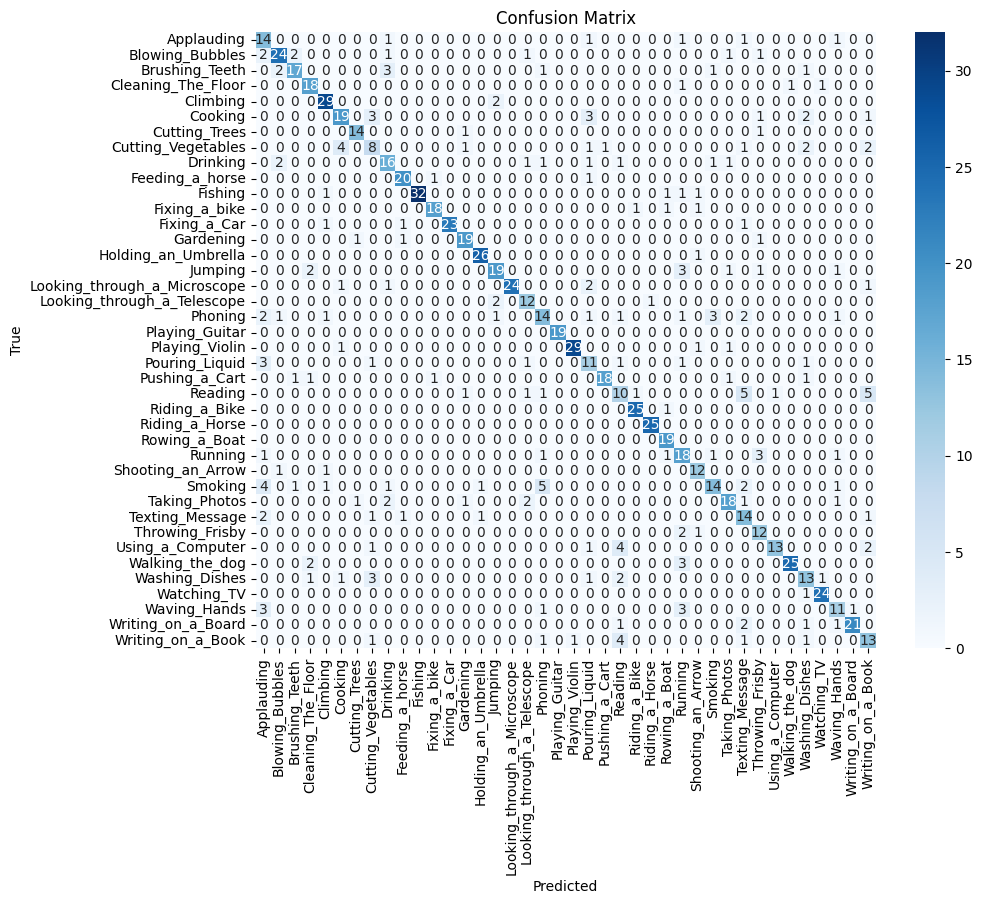

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(all_labels, all_preds)
print(conf_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

b. Dense Net

In [ ]:
import torchvision.models as models
pretrained_model_googlenet = models.googlenet(pretrained=True)
pretrained_model_densenet = models.densenet121(pretrained=True)
import torch.nn as nn

num_classes = len(class_paths)

num_ftrs_densenet = pretrained_model_densenet.classifier.in_features
pretrained_model_densenet.classifier = nn.Linear(num_ftrs_densenet, num_classes)

print(pretrained_model_densenet)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=GoogLeNet_Weights.IMAGENET1K_V1`. You can also use `weights=GoogLeNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-d

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

Training the Model

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

def train_model(model, train_loader, val_loader, criterion, optimizer, classes, device, num_epochs=5):

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct_train = 0
        total_train = 0

        for images, labels_tuple in train_loader:
            inputs = images.to(device)

            labels = torch.tensor([classes.index(label) for label in labels_tuple]).to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item() * inputs.size(0)


            _, predicted = torch.max(outputs, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

        epoch_loss = running_loss / len(train_loader.dataset)
        train_acc = correct_train / total_train

        model.eval()
        val_loss = 0.0
        correct_val = 0
        total_val = 0

        with torch.no_grad():
            for images, labels_tuple in val_loader:
                inputs = images.to(device)
                labels = torch.tensor([classes.index(label) for label in labels_tuple]).to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item() * inputs.size(0)

                _, predicted = torch.max(outputs, 1)
                total_val += labels.size(0)
                correct_val += (predicted == labels).sum().item()

        val_loss /= len(val_loader.dataset)
        val_acc = correct_val / total_val

        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {epoch_loss:.4f}, Train Acc: {train_acc:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}')

    return model


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


criterion = nn.CrossEntropyLoss()
optimizer_densenet = optim.Adam(pretrained_model_densenet.parameters(), lr=0.0001)


pretrained_model_densenet = pretrained_model_densenet.to(device)
pretrained_model_densenet = train_model(pretrained_model_densenet, train_loader, val_loader, criterion, optimizer_densenet, classes, device, num_epochs=10)

Epoch [1/10], Train Loss: 1.5582, Train Acc: 0.5411, Val Loss: 0.1654, Val Acc: 0.7411
Epoch [2/10], Train Loss: 0.5867, Train Acc: 0.8305, Val Loss: 0.1136, Val Acc: 0.8055
Epoch [3/10], Train Loss: 0.2454, Train Acc: 0.9400, Val Loss: 0.1051, Val Acc: 0.8020
Epoch [4/10], Train Loss: 0.0971, Train Acc: 0.9822, Val Loss: 0.0976, Val Acc: 0.8083
Epoch [5/10], Train Loss: 0.0521, Train Acc: 0.9926, Val Loss: 0.1015, Val Acc: 0.8055
Epoch [6/10], Train Loss: 0.0309, Train Acc: 0.9962, Val Loss: 0.1145, Val Acc: 0.7838
Epoch [7/10], Train Loss: 0.0449, Train Acc: 0.9894, Val Loss: 0.1129, Val Acc: 0.7894
Epoch [8/10], Train Loss: 0.0471, Train Acc: 0.9876, Val Loss: 0.1170, Val Acc: 0.7922
Epoch [9/10], Train Loss: 0.0272, Train Acc: 0.9943, Val Loss: 0.1240, Val Acc: 0.7859
Epoch [10/10], Train Loss: 0.0343, Train Acc: 0.9896, Val Loss: 0.1232, Val Acc: 0.7957


Evaluating the Model

In [ ]:
def evaluate_model(model, data_loader, classes, device):
    model.eval()
    correct = 0
    total = 0
    all_preds = []
    all_labels = []
    total_loss = 0.0

    with torch.no_grad():
        for images, labels_tuple in data_loader:
            inputs = images.to(device)
            labels = torch.tensor([classes.index(label) for label in labels_tuple]).to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            total_loss += loss.item() * inputs.size(0)

            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            all_preds.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    avg_loss = total_loss / len(data_loader.dataset)
    accuracy = correct / total

    return avg_loss, accuracy, all_preds, all_labels

test_loss, test_acc, all_preds, all_labels = evaluate_model(pretrained_model_densenet, test_loader, classes, device)

print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}')

Test Loss: 0.0874, Test Accuracy: 0.7799


Plotting Training and Validation Accuracy and Loss

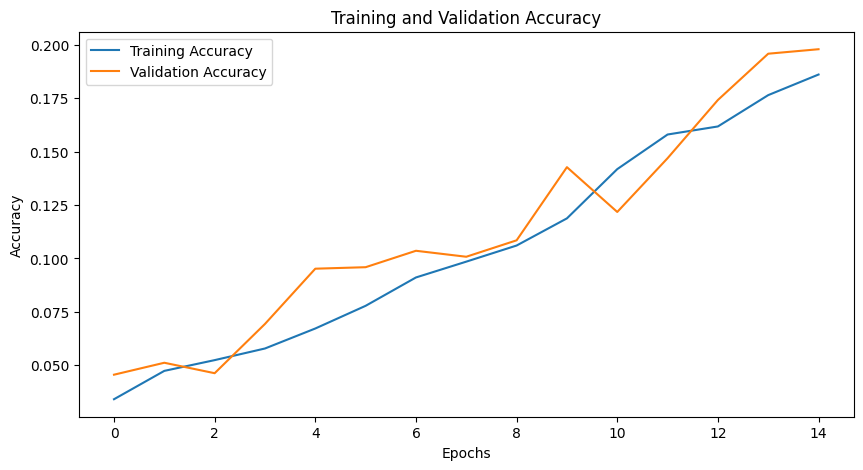

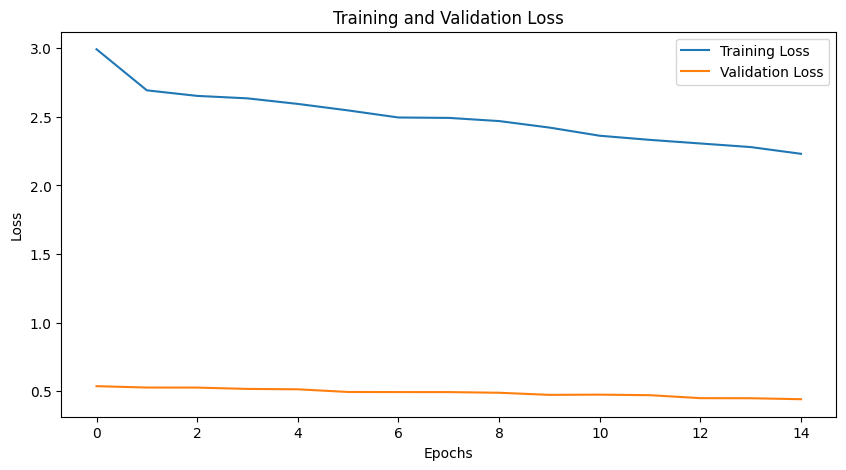

In [ ]:

plt.figure(figsize=(10, 5))
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

Confusion Matrix

[[ 4  0  0 ...  4  0  0]
 [ 0 26  1 ...  0  0  0]
 [ 0  0 20 ...  0  1  0]
 ...
 [ 2  0  0 ... 13  0  0]
 [ 0  0  0 ...  0 21  1]
 [ 0  0  0 ...  0  0 16]]


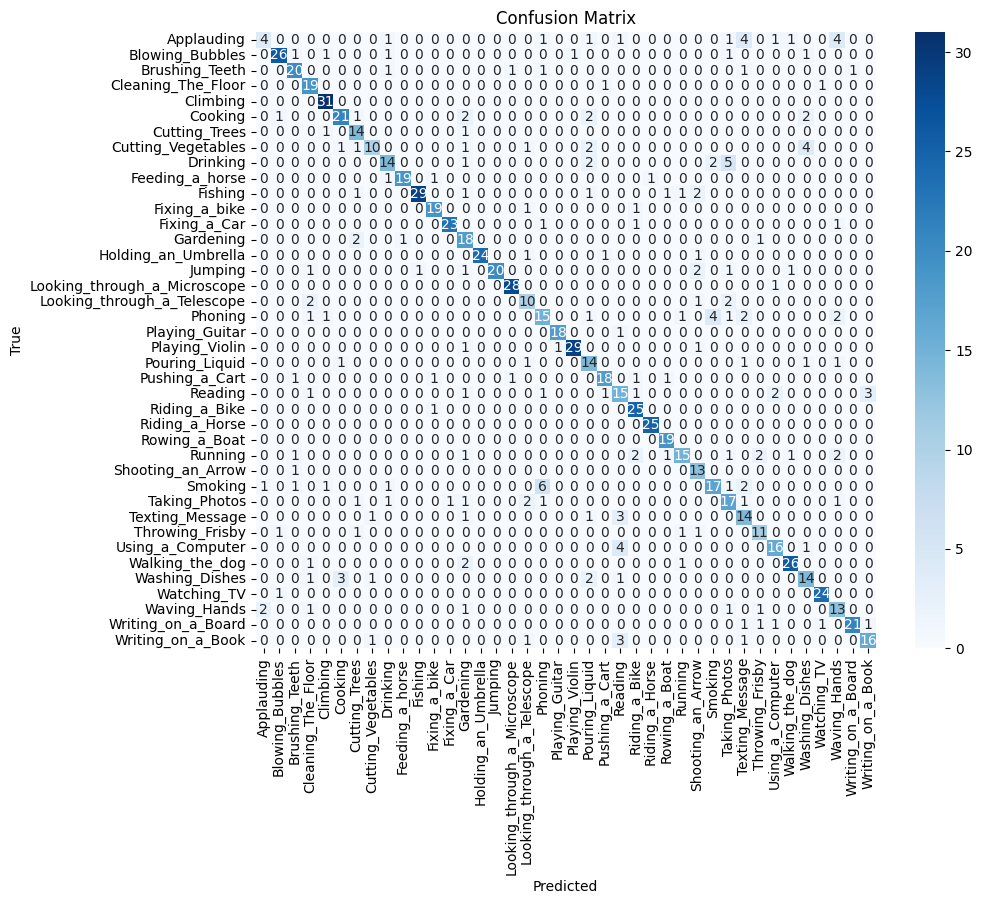

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(all_labels, all_preds)
print(conf_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Classification Report

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support

report = classification_report(all_labels, all_preds, target_names=classes)
print(report)

precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average='weighted')
print(f'Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}')

                              precision    recall  f1-score   support

                  Applauding       0.57      0.21      0.31        19
             Blowing_Bubbles       0.90      0.81      0.85        32
              Brushing_Teeth       0.80      0.80      0.80        25
          Cleaning_The_Floor       0.70      0.90      0.79        21
                    Climbing       0.89      1.00      0.94        31
                     Cooking       0.81      0.72      0.76        29
               Cutting_Trees       0.67      0.88      0.76        16
          Cutting_Vegetables       0.77      0.50      0.61        20
                    Drinking       0.70      0.58      0.64        24
             Feeding_a_horse       0.95      0.86      0.90        22
                     Fishing       0.97      0.81      0.88        36
               Fixing_a_bike       0.86      0.90      0.88        21
                Fixing_a_Car       0.96      0.88      0.92        26
                   